In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [234]:
train = pd.read_csv('titanic_train.csv')

In [235]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning up the source data

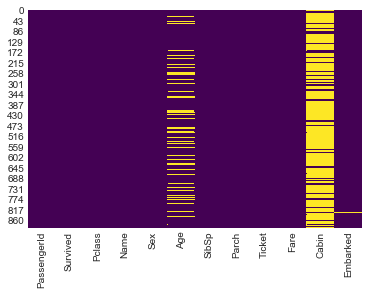

In [236]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [237]:
train[train['Age'].isnull()==True].count()
train['Age'].count()


714

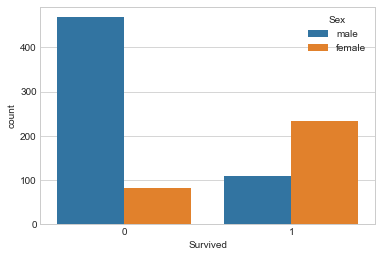

In [238]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, hue='Sex',)

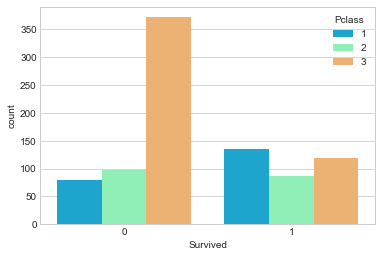

In [239]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

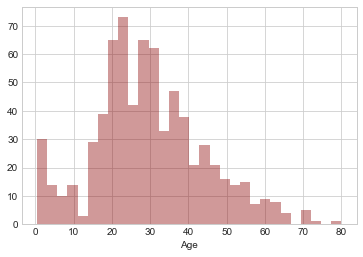

In [240]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

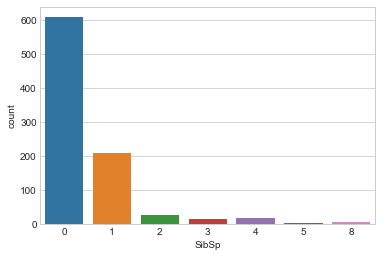

In [241]:
sns.countplot(x=train['SibSp'],data=train)

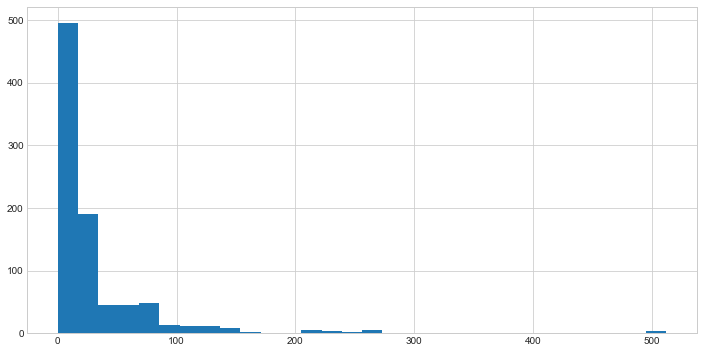

In [242]:
train['Fare'].hist(bins=30,figsize=(12,6))

In [243]:
import cufflinks as cf

In [244]:
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [245]:
#train['Fare'].iplot(kind='hist',bins=50)

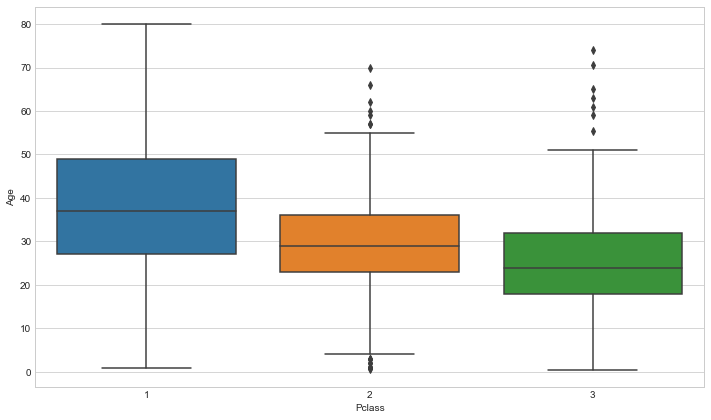

In [246]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

# Removing NaN by creating a simple impute function

In [247]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: return Age

In [248]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

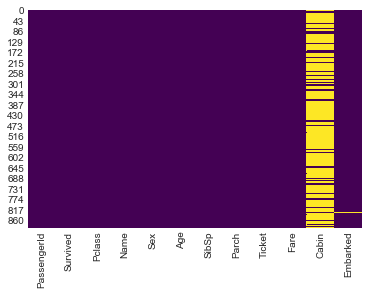

In [249]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [250]:
train.drop('Cabin',axis=1,inplace=True)

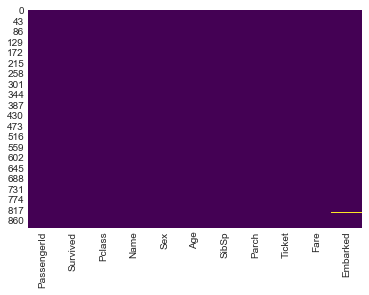

In [251]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [252]:
train.dropna(inplace=True)

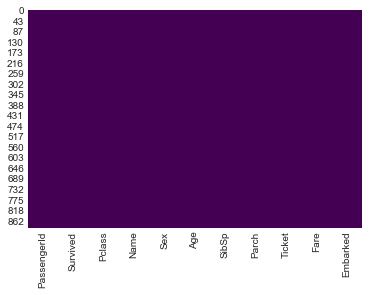

In [253]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

# Convert data to Machine Readable form

In [254]:
sex = pd.get_dummies(train['Sex'],drop_first=True) #get dummies changes categories 

In [255]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [256]:
pcl = pd.get_dummies(train['Pclass'],drop_first=True)

In [257]:
train = pd.concat([train, sex, embark, pcl],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [258]:
train.drop(['Sex','Embarked','Name', 'Ticket','Pclass'],inplace=True, axis=1)

In [259]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [260]:
train.drop('PassengerId', inplace=True, axis=1)

In [261]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [262]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

# Logistic Regression

In [301]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [302]:
from sklearn.cross_validation import train_test_split

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [394]:
from sklearn.linear_model import LogisticRegression

In [395]:
lm = LogisticRegression()

In [396]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [397]:
predictions = lm.predict(X_test)

In [398]:
from sklearn.metrics import classification_report

In [399]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.79      0.82      0.81       181
          1       0.70      0.65      0.68       113

avg / total       0.76      0.76      0.76       294



In [400]:
from sklearn.metrics import confusion_matrix

In [401]:
print(confusion_matrix(y_test,predictions))

[[149  32]
 [ 39  74]]


In [402]:
a = lm.coef_[0]
cdf = pd.DataFrame(a, X_train.columns, columns=['Coefficients'])

cdf

,Coefficients
Age,-0.020260
SibSp,-0.210414
Parch,0.001040
Fare,0.004312
male,-2.544046
Q,-0.055633
S,-0.338897
2,-0.409199
3,-1.576448


# Test case fit

In [403]:
test = pd.read_csv('titanic_test.csv')
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [404]:
sex1 = pd.get_dummies(test['Sex'],drop_first=True)
embark1 = pd.get_dummies(test['Embarked'],drop_first=True)
pcl1 = pd.get_dummies(test['Pclass'],drop_first=True)

test = pd.concat([test, sex1, embark1,pcl1],axis=1)

test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
male           418
Q              418
S              418
2              418
3              418
dtype: int64

In [405]:
X_test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

In [406]:
X1 = test[['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3,'Pclass']]
X1.count()

Age       332
SibSp     418
Parch     418
Fare      417
male      418
Q         418
S         418
2         418
3         418
Pclass    418
dtype: int64

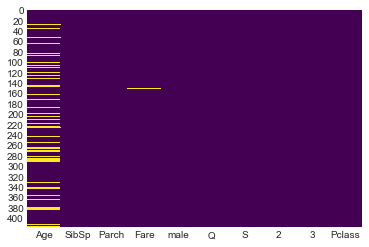

In [407]:
sns.heatmap(X1.isnull(),cbar=False,cmap='viridis')

In [408]:
X1['Age'] = X1[['Age','Pclass']].apply(impute_age,axis=1)

/Users/viveksasikumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [409]:
X1.drop('Pclass', inplace=True, axis=1)

/Users/viveksasikumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [410]:
X1.fillna(X1['Fare'].mean(),inplace=True)
X1.count()

/Users/viveksasikumar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Age      418
SibSp    418
Parch    418
Fare     418
male     418
Q        418
S        418
2        418
3        418
dtype: int64

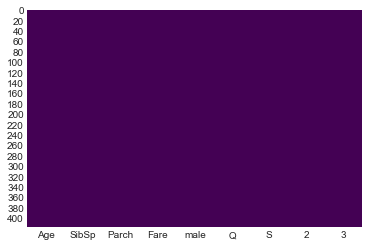

In [411]:
sns.heatmap(X1.isnull(),cbar=False,cmap='viridis')

In [412]:
predictions1 = lm.predict(X1)
x = pd.DataFrame(predictions1,columns=['Survived'])
x.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [413]:
def mf(v):
    Pred = v[0]
    if v[0] == 0:
        return 'No'
    elif v[0] == 1:
        return 'Yes'
    return Pred

x['Survive(Y/N)'] = x[['Survived']].apply(mf,axis=1)
x.head()

,Survived,Survive(Y/N)
0,0,No
1,0,No
2,0,No
3,0,No
4,1,Yes


In [414]:
final = pd.concat([test['Name'].dropna(), x['Survived']],axis=1)
final.tail()

,Name,Survived
413,"Spector, Mr. Woolf",0
414,"Oliva y Ocana, Dona. Fermina",1
415,"Saether, Mr. Simon Sivertsen",0
416,"Ware, Mr. Frederick",0
417,"Peter, Master. Michael J",0


In [415]:
export1 = pd.concat([test['PassengerId'],x['Survived']],axis=1)
export1.set_index('PassengerId',inplace=True)
export1.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [416]:
export1.to_csv('/Users/viveksasikumar/Downloads/gender_submission_1.csv')